# Funções, bibliotecas e Dataframe ficticios

In [33]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib.font_manager as fm #para alterar as fontes dos graficos
import seaborn as sns

import pyperclip

# Definindo o estilo de fonte e tema
fonte = fm.FontProperties(family="Calibri", style="italic")

sns.set_style('whitegrid') #cor da grade(fundo)

In [34]:
import pandas as pd
import numpy as np

# Manipulação e Tratamento de dados
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [35]:
import traceback

In [36]:
import requests

# CARREGANDO BASE
arquivo = 'fake_database'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
#response = requests.get(url); code = response.text; exec(code)
#df = fake_database2(2250); df_bck = df.copy(); display(df.head())

arquivo = 'funcoes_estatisticas'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url)
response = requests.get(url); code = response.text; exec(code)

# Função para avaliação de modelos exibindo metricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
arquivo = 'ML_supervised_learning'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
print(url); response = requests.get(url); code = response.text; exec(code)

print('TUDO OK')

https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/fake_database.py
https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/funcoes_estatisticas.py
https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/ML_supervised_learning.py
TUDO OK


In [37]:
def contribuicao_proba_tabela(df, coluna_analisada, model, sep=10):
    # Criar DataFrame para análise com a variável de interesse variando em um intervalo
    minimo, maximo = df[coluna_analisada].min(), df[coluna_analisada].max()
    df_analise_feature = pd.DataFrame()

    # Preencher as demais colunas com o valor médio
    for coluna in df.columns:
        if coluna != coluna_analisada:
            df_analise_feature[coluna] = df[coluna].mean()
        else:
            df_analise_feature[coluna] = np.linspace(minimo, maximo, sep)

    # Fazer previsão de probabilidade e adicionar ao DataFrame de análise
    df_analise_feature['predict_proba'] = model.predict_proba(df_analise_feature)[:, 1]

    # Retornar apenas a coluna analisada e a probabilidade prevista
    return df_analise_feature[[coluna_analisada, 'predict_proba']]

#x_data = pd.DataFrame(x_teste, columns=df.columns[:-1])
#resultado = contribuicao_proba_tabela(x_data, 'feature_4', modelo_m1, sep=10)
#resultado

def contribuicao_proba_grafico(resultado, coluna):
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(resultado['predict_proba'].min(), resultado['predict_proba'].max())
    colors = cmap(norm(resultado['predict_proba']))

    ax = sns.lineplot(x=resultado[coluna].round(1), y=resultado['predict_proba'])

#plt.figure(figsize=(4,3))
#contribuicao_proba_grafico(resultado, 'feature_4')
#plt.show()

def contribuicao_proba(x_data, modelo, sep=10):
    for i, coluna_analisada in enumerate(x_data.columns, 1):
        plt.subplot(10, 3, i)
        resultado = contribuicao_proba_tabela(x_data, coluna_analisada, modelo, sep=sep)
        contribuicao_proba_grafico(resultado, coluna_analisada)


from sklearn.inspection import PartialDependenceDisplay
def contribuicao_proba2(x_data, modelo):
    # Definir o tamanho da figura geral
    fig, axes = plt.subplots(len(x_data.columns)//3+1, 3, figsize=(10, 10))
    axes = axes.ravel()  # Transformar a matriz de eixos em uma lista para fácil iteração

    # Iterar pelas colunas e gerar gráficos de dependência parcial
    for i, column in enumerate(x_data.columns):
        PartialDependenceDisplay.from_estimator(modelo, x_data, [column], ax=axes[i])

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

# Criando dataframe sintetico desbalanceado

In [38]:
from sklearn.datasets import make_classification
import pandas as pd

# Gerar dados sintéticos desbalanceados
x, y = make_classification(n_samples=7000, 
                           n_features=10, # qtd total de features
                           n_informative=6, # features realmente uteis para o modelo
                           n_redundant=3, # features que diz praticamente oque uma outra já fim
                           n_classes=2, 
                           n_clusters_per_class=3,  # Subgrupos
                           weights=[0.93, 0.07], 
                           class_sep=0.2,
                           random_state=3141592)

# Criar um DataFrame
df = pd.DataFrame(x, columns=[f'feature_{i}' for i in range(x.shape[1])])
df['target'] = y

# Ver a distribuição de classes
print(df['target'].value_counts(normalize=True))
print(df['target'].value_counts())

display(pd.concat([df.head(5), df.tail(5)]).T)
# Salvar para análise
#df.to_csv('imbalanced_dataset.csv', index=False)


target
0    0.927143
1    0.072857
Name: proportion, dtype: float64
target
0    6490
1     510
Name: count, dtype: int64


0         1         2         3         4         6995  \
feature_0 -0.642497 -1.785283  0.079050  2.436769  2.451769 -1.783980   
feature_1  0.948709  0.388126 -0.191437 -0.736520 -2.295541  0.942644   
feature_2  0.240576  1.202669 -2.116739  0.690500  0.531063  0.153204   
feature_3  0.457879 -0.741282 -1.945396  0.004735  1.337750  0.186867   
feature_4 -0.540885  2.006766  2.148747 -1.606037 -1.677591  1.826851   
feature_5  0.288010 -0.291841 -0.467650 -0.861244  0.169983 -0.855976   
feature_6  0.325187  2.563677 -2.922785 -0.520395 -2.824324  1.398319   
feature_7 -0.256822 -1.929956  4.374474  0.561111  1.564101 -0.319670   
feature_8  0.143634  1.586863 -1.690032 -1.361284 -2.357939  1.413860   
feature_9 -0.278204 -0.522574 -1.498296  1.005291 -0.235319 -0.978672   
target     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

               6996      6997      6998      6999  
feature_0 -1.137174 -7.347030  0.135621  0.476781  
feature_1  1.158989  1.470477 -2.280598  0.287225  
feature_2  0.998049 -2.170876  1.556853  0.149235  
feature_3 -0.509135  2.242134  1.845950  0.851162  
feature_4  0.248383  5.225310  0.811107 -0.178302  
feature_5  0.103258  1.923538 -0.199175 -1.190920  
feature_6  2.072569 -1.515159 -1.307056 -0.498096  
feature_7 -1.632147  1.646067  0.533623  1.279855  
feature_8  0.924344  2.477076 -0.881455 -0.454233  
feature_9  0.049616 -5.689879 -1.946096 -0.532001  
target     0.000000  0.000000  0.000000  0.000000

# Tratando o DataFrame

In [39]:
# Variavel Dependente
var_dep = 'target'
y = df[var_dep]
display(y.head())

x = df.drop(var_dep, axis=1)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [40]:
# DUMMYRIZAÇÃO
colunas_categoricas = []
colunas_binarias = []
colunas_mais3_categorias = []

for coluna in x.columns:
    if df[coluna].dtype == 'O':
        categorias = x[coluna].unique()
        if len(categorias) == 2:
            print('2 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_binarias.append(coluna)
        else:
            print('3 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_mais3_categorias.append(coluna)

############################################################################################
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder #transformando colunas com 2 categorias em 0 e 1

coluna = x.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'), #caso a coluna tenha apenas 2 categorias 
    colunas_categoricas), #passando quais são essas colunas
    remainder = 'passthrough', sparse_threshold=0) #oque deve ser feito com as outras

#Aplicando transformação
x = one_hot.fit_transform(x)

#Os novos nomes das colunas #'onehotencoder=transformadas; 'remainder'=não transformadas
novos_nomes_colunas = one_hot.get_feature_names_out(coluna)

# Remover prefixo 'remainder__' das colunas que não foram transformadas
#novos_nomes_colunas = [nome.replace('remainder__', '') for nome in novos_nomes_colunas]

x = pd.DataFrame(x, columns = novos_nomes_colunas) #alterando de volta
x_columns = x.columns.tolist() 

############################################################################################
# Normalização (scaling entre 0 e 1) com MinMaxScaler ******************************
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
#x = normalizacao.fit_transform(x)
# df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

# Padronização (média 0 e desvio padrão 1) com StandardScaler **********************
from sklearn.preprocessing import StandardScaler
padronizacao = StandardScaler()
#x = padronizacao.fit_transform(x)
# df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()

############################################################################################
# DEFININDO A VARIAVEL DEPENDENTE
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

############################################################################################
#backups
x_inteiro = x
y_inteiro = y

# DIVIDINDO BASE EM TREINO E TESTE
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                    stratify = y, #para manter a proporção da Var Dep nos splits
                                                    random_state = 5) #raiz da aleatoridade
# test_size = 0.25 #porcentagem que ira ser separado para testes

print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

(5250, 10) (1750, 10)
(5250,) (1750,)


# Instanciando modelos

In [41]:
sem_random = 3141592

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier,
                              BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


# Definir a semente aleatória
sem_random = 3141592

# Criar dicionário com todos os modelos
model_dict = {
    # Modelos Baseados em Árvores
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=sem_random),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state=sem_random),
    'RandomForestClassifier': RandomForestClassifier(random_state=sem_random),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=sem_random),
    'BaggingClassifier': BaggingClassifier(random_state=sem_random),
    
    # Modelos de Boosting
    'AdaBoostClassifier': AdaBoostClassifier(random_state=sem_random),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=sem_random),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(random_state=sem_random),
    'XGBClassifier': XGBClassifier(random_state=sem_random),
    'LGBMClassifier': LGBMClassifier(random_state=sem_random),
    'CatBoostClassifier': CatBoostClassifier(verbose=0)
}

#for model_name in model_dict:
#    print(model_name, '->', model_dict[model_name])

model_dict_smote = {
    # Modelos Baseados em Árvores
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=sem_random),
    'ExtraTreeClassifier': ExtraTreeClassifier(random_state=sem_random),
    'RandomForestClassifier': RandomForestClassifier(random_state=sem_random),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=sem_random),
    'BaggingClassifier': BaggingClassifier(random_state=sem_random),
    
    # Modelos de Boosting
    'AdaBoostClassifier': AdaBoostClassifier(random_state=sem_random),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=sem_random),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(random_state=sem_random),
    'XGBClassifier': XGBClassifier(random_state=sem_random),
    'LGBMClassifier': LGBMClassifier(random_state=sem_random),
    'CatBoostClassifier': CatBoostClassifier(verbose=0)
}

#for model_name in model_dict:
#    print(model_name, '->', model_dict[model_name])

# Dados sinteticos SMOTE

In [42]:
# BALANCEAMENTO DE DADOS - OVERSAMPLING
from imblearn.over_sampling import SMOTE

#criando dados sintéticos
oversample = SMOTE() 
x_treino_balanceado, y_treino_balanceado = oversample.fit_resample(x_treino, y_treino)

# checkando
print(pd.Series(y_treino_balanceado).value_counts())
print(pd.Series(y_treino_balanceado).value_counts(normalize = True))

#######################################################################################

0    4868
1    4868
Name: count, dtype: int64
0    0.5
1    0.5
Name: proportion, dtype: float64


# Treinando modelos

In [43]:
model_dict.items()

dict_items([('DecisionTreeClassifier', DecisionTreeClassifier(random_state=3141592)), ('ExtraTreeClassifier', ExtraTreeClassifier(random_state=3141592)), ('RandomForestClassifier', RandomForestClassifier(random_state=3141592)), ('ExtraTreesClassifier', ExtraTreesClassifier(random_state=3141592)), ('BaggingClassifier', BaggingClassifier(random_state=3141592)), ('AdaBoostClassifier', AdaBoostClassifier(random_state=3141592)), ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=3141592)), ('HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=3141592)), ('XGBClassifier', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=

In [44]:
import time

print('*'*30, 'NORMAL', '*'*30)
# Treinando todos os modelos
tab_modelo_treinados = pd.DataFrame(columns=['Modelo', 'Status', 'Tempo'])
for model_name, model_instance in model_dict.items():
    try:
        start_time = time.time()
        model_instance.fit(x_treino, y_treino)
        end_time = time.time()
        training_time = end_time - start_time
        tab_modelo_treinados.loc[len(tab_modelo_treinados)] = [model_name, 'OK', training_time]
    except Exception as e:
        tab_modelo_treinados.loc[len(tab_modelo_treinados)] = [model_name, 'Erro', np.nan]
        #del model_dict[model_name] # excluindo do dicionario # não pode modificar o dicionario durante iteracao

print('*'*30, 'SMOTE', '*'*30)
# Treinando todos os modelos com dados balanceados (SMOTE)
tab_modelo_smote_treinados = pd.DataFrame(columns=['Modelo', 'Status', 'Tempo'])
for model_name, model_instance in model_dict_smote.items():
    try:
        start_time = time.time()
        model_instance.fit(x_treino_balanceado, y_treino_balanceado)
        end_time = time.time()
        training_time = end_time - start_time
        tab_modelo_smote_treinados.loc[len(tab_modelo_smote_treinados)] = [model_name, 'OK', training_time]
    except Exception as e:
        tab_modelo_smote_treinados.loc[len(tab_modelo_smote_treinados)] = [model_name, 'Erro', np.nan]
        #del model_dict_smote[model_name] # excluindo do dicionario # não pode modificar o dicionario durante iteracao

print('*'*30, 'FIM', '*'*30)

display(tab_modelo_treinados)
display(tab_modelo_smote_treinados)

****************************** NORMAL ******************************
[LightGBM] [Info] Number of positive: 382, number of negative: 4868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 5250, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.072762 -> initscore=-2.545018
[LightGBM] [Info] Start training from score -2.545018
****************************** SMOTE ******************************
[LightGBM] [Info] Number of positive: 4868, number of negative: 4868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 9736, number of used features: 10
[LightGBM] [Info

Modelo Status      Tempo
0           DecisionTreeClassifier     OK   0.334625
1              ExtraTreeClassifier     OK   0.015230
2           RandomForestClassifier     OK   5.612464
3             ExtraTreesClassifier     OK   1.252881
4                BaggingClassifier     OK   1.436806
5               AdaBoostClassifier     OK   1.020745
6       GradientBoostingClassifier     OK   4.779303
7   HistGradientBoostingClassifier     OK   1.065243
8                    XGBClassifier     OK   0.497458
9                   LGBMClassifier     OK   0.265632
10              CatBoostClassifier     OK  11.331797

Modelo Status      Tempo
0           DecisionTreeClassifier     OK   0.248019
1              ExtraTreeClassifier     OK   0.021764
2           RandomForestClassifier     OK   8.693196
3             ExtraTreesClassifier     OK   2.600280
4                BaggingClassifier     OK   2.750334
5               AdaBoostClassifier     OK   1.990010
6       GradientBoostingClassifier     OK   8.839985
7   HistGradientBoostingClassifier     OK   0.774854
8                    XGBClassifier     OK   0.367886
9                   LGBMClassifier     OK   0.245399
10              CatBoostClassifier     OK  11.584477

# Analisando as probabilidades geradas pelos modelos

In [45]:
def adicionar_previsoes(x_teste, y_teste, **modelos):
    # Inicializa o DataFrame com a coluna `y`
    df = pd.DataFrame({'y': y_teste})

    # Para cada modelo, gera previsões e adiciona ao DataFrame
    for nome, modelo in modelos.items():
        try:
        #if hasattr(modelo, "predict_proba"):
            df[nome] = modelo.predict_proba(x_teste)[:, 1] * 100
        except:
            print('erro:', nome)

    return df

previsoes_normal = adicionar_previsoes(x_teste, y_teste, **model_dict)
previsoes_normal['tipo'] = 'normal'
previsoes_smote = adicionar_previsoes(x_teste, y_teste, **model_dict_smote)
previsoes_smote['tipo'] = 'smote'

previsoes = pd.concat([previsoes_normal, previsoes_smote])
previsoes = previsoes.reset_index(drop=True)

previsoes.sample(10)

y  DecisionTreeClassifier  ExtraTreeClassifier  RandomForestClassifier  \
2705  0                     0.0                  0.0                     3.0   
1318  0                     0.0                  0.0                    27.0   
1408  0                     0.0                  0.0                    11.0   
140   0                     0.0                100.0                     6.0   
802   0                     0.0                  0.0                     3.0   
315   0                     0.0                  0.0                     1.0   
1056  0                   100.0                  0.0                    21.0   
3331  0                     0.0                  0.0                     2.0   
743   0                     0.0                  0.0                     4.0   
1433  0                     0.0                  0.0                     1.0   

      ExtraTreesClassifier  BaggingClassifier  AdaBoostClassifier  \
2705                   8.0               10.0           49.525172   
1318                  28.0               20.0           48.871801   
1408                   6.0                0.0           47.776749   
140                    6.0                0.0           48.671068   
802                    2.0                0.0           48.494701   
315                    1.0                0.0           48.190753   
1056                  13.0               60.0           49.074683   
3331                   4.0                0.0           49.557613   
743                    1.0                0.0           48.287274   
1433                   1.0                0.0           48.646367   

      GradientBoostingClassifier  HistGradientBoostingClassifier  \
2705                   26.924678                        2.628969   
1318                   18.068809                       11.201141   
1408                    2.940815                        1.364008   
140                     9.032317                        3.372183   
802                     2.224923                        0.277575   
315                     3.292795                        0.181199   
1056                    9.254835                       29.395729   
3331                   19.047413                        1.106009   
743                     3.420657                        2.252298   
1433                    4.833403                        1.878636   

      XGBClassifier  LGBMClassifier  CatBoostClassifier    tipo  
2705       0.217606        3.373198            7.573881   smote  
1318      20.759872       27.809200           27.119258  normal  
1408       0.820899        1.973845            3.330381  normal  
140        0.543584        1.855261            5.383797  normal  
802        0.045259        0.230374            0.329390  normal  
315        0.079142        0.186787            0.213455  normal  
1056       3.086756       12.961964           15.224940  normal  
3331       0.257354        1.805525            2.052135   smote  
743        3.144225        1.059854            1.581932  normal  
1433       0.095021        0.958092            1.878553  normal

In [46]:
colunas = list(previsoes.columns)
colunas.remove('y')
px.box(previsoes, y=colunas, color="y", facet_row="tipo")

In [47]:
outliers_df = pd.DataFrame(columns=['Coluna', 'Grupo_y', 'Grupo_tipo', 'Quantidade de Outliers'])

# Iterar pelos grupos definidos pelas colunas 'y' e 'tipo'
for (y_value, tipo_value), group in previsoes.groupby(['y', 'tipo']):
    # Iterar sobre cada coluna (exceto 'y' e 'tipo') e calcular o número de outliers para cada grupo
    for coluna in group.columns:
        if coluna not in ['y', 'tipo']:
            # Calcular os quartis e o intervalo interquartil (IQR)
            Q1 = group[coluna].quantile(0.25)
            Q3 = group[coluna].quantile(0.75)
            IQR = Q3 - Q1

            # Definir limites inferiores e superiores para detectar outliers
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            # Contar quantos valores estão fora dos limites definidos
            outliers_count = group[(group[coluna] < limite_inferior) | (group[coluna] > limite_superior)].shape[0]

            # Adicionar a contagem de outliers ao DataFrame final
            outliers_df.loc[len(outliers_df)] = [coluna, y_value, tipo_value, outliers_count]

# Exibir o DataFrame de outliers
#display(outliers_df)

px.bar(outliers_df, 
       x='Coluna', 
       y='Quantidade de Outliers', 
       facet_row='Grupo_tipo',
       facet_col='Grupo_y', 
       text='Quantidade de Outliers')

In [48]:
beta = 1.5

lista_modelos = list(previsoes.columns)
lista_modelos.remove('y'); lista_modelos.remove('tipo')
lista_modelos

fd = pd.DataFrame(columns=['modelo', 'tipo', 'threshold', 'tn', 'fp', 'fn', 'tp'])

for modelo in lista_modelos:
    fdzinho = aval_modelo_corte_tabela(x_teste, y_teste, model_dict[modelo], beta = beta, pontos_de_corte = np.arange(10, 110, 10))
    fdzinho['modelo'] = modelo
    fdzinho['tipo'] = 'normal'

    fdzinho_smote = aval_modelo_corte_tabela(x_teste, y_teste, model_dict_smote[modelo], beta = beta, pontos_de_corte = np.arange(10, 110, 10))
    fdzinho_smote['modelo'] = modelo
    fdzinho_smote['tipo'] = 'smote'
    fd = pd.concat([fd, fdzinho, fdzinho_smote])

# Substituir valores NaN por 0
#fd.fillna(0, inplace=True)
fd = fd.reset_index(drop=True)
######################################################################################

# Inicializar as colunas das métricas com NaN
metricas_de_aval = ['acuracia', 'precisao', 'sensibilidade', 'especificidade', 'f1',
                    'valor_pre_posi', 'valor_pre_neg', 'taxa_falsos_positivos', 'taxa_falsos_negativos',
                    'fdr', 'fo_r', 'indice_youden', 'coef_matthews', 'fb_score']
fd[metricas_de_aval] = fd[metricas_de_aval].round(3)
colunas_uteis = ['modelo', 'tipo',
                 'threshold', 
                 'tn', 'fp', 'fn', 'tp', 
                 'precisao', 'sensibilidade', 
                 'f1', 'fb_score']
fd = fd[colunas_uteis]

custo_fp = 3.33
custo_fn = 10
fd['custo_total'] = fd['fp']*custo_fp + fd['fn']*custo_fn

fd = fd.sort_values(by='fb_score', ascending=False)
#fd = fd.sort_values(by='custo_total', ascending=True)
#print(fd['modelo'].unique()[:6])
fd.head(20)

modelo    tipo threshold    tn   fp  fn  tp  precisao  \
61     ExtraTreesClassifier  normal        20  1547   75  60  68     0.476   
215      CatBoostClassifier   smote        60  1553   69  64  64     0.481   
200      CatBoostClassifier  normal        10  1500  122  55  73     0.374   
214      CatBoostClassifier   smote        50  1508  114  57  71     0.384   
41   RandomForestClassifier  normal        20  1564   58  67  61     0.513   
53   RandomForestClassifier   smote        40  1486  136  54  74     0.352   
54   RandomForestClassifier   smote        50  1559   63  67  61     0.492   
173           XGBClassifier   smote        40  1488  134  56  72     0.350   
176           XGBClassifier   smote        70  1570   52  70  58     0.527   
213      CatBoostClassifier   smote        40  1447  175  49  79     0.311   
201      CatBoostClassifier  normal        20  1582   40  72  56     0.583   
174           XGBClassifier   smote        50  1522  100  62  66     0.398   
172           XGBClassifier   smote        30  1450  172  50  78     0.312   
216      CatBoostClassifier   smote        70  1579   43  72  56     0.566   
160           XGBClassifier  normal        10  1541   81  66  62     0.434   
73     ExtraTreesClassifier   smote        40  1528   94  64  64     0.405   
175           XGBClassifier   smote        60  1551   71  68  60     0.458   
177           XGBClassifier   smote        80  1590   32  76  52     0.619   
195          LGBMClassifier   smote        60  1538   84  68  60     0.417   
194          LGBMClassifier   smote        50  1487  135  60  68     0.335   

     sensibilidade     f1  fb_score custo_total  
61           0.531  0.502     0.513      1387.5  
215          0.500  0.490     0.494      1452.5  
200          0.570  0.452     0.491      1405.0  
214          0.555  0.454     0.488      1425.0  
41           0.477  0.494     0.487      1485.0  
53           0.578  0.438     0.483      1420.0  
54           0.477  0.484     0.481      1497.5  
173          0.562  0.431     0.474      1455.0  
176          0.453  0.487     0.474      1530.0  
213          0.617  0.414     0.474      1417.5  
201          0.438  0.500     0.474      1540.0  
174          0.516  0.449     0.472      1490.0  
172          0.609  0.413     0.471      1430.0  
216          0.438  0.493     0.470      1547.5  
160          0.484  0.458     0.468      1522.5  
73           0.500  0.448     0.466      1515.0  
175          0.469  0.463     0.465      1537.5  
177          0.406  0.491     0.454      1600.0  
195          0.469  0.441     0.451      1570.0  
194          0.531  0.411     0.450      1537.5

In [49]:
fd['threshold'] = fd['threshold'].astype('int')

In [50]:
fig = px.scatter(fd, x='fb_score', y='custo_total', color='tipo', symbol='threshold',
                 hover_data=['precisao', 'sensibilidade', 'modelo'])
fig.show()

fig = px.scatter(fd, x='fb_score', y='custo_total', color='threshold', facet_row='tipo',
                 hover_data=['precisao', 'sensibilidade', 'modelo'])
fig.show()

# selecionando apenas os 6 melhores

In [51]:
print(list(fd['modelo'][fd['tipo'] == 'normal'].unique()[:6]))
print(list(fd['modelo'][fd['tipo'] == 'smote'].unique()[:6]))

['ExtraTreesClassifier', 'CatBoostClassifier', 'RandomForestClassifier', 'XGBClassifier', 'HistGradientBoostingClassifier', 'LGBMClassifier']
['CatBoostClassifier', 'RandomForestClassifier', 'XGBClassifier', 'ExtraTreesClassifier', 'LGBMClassifier', 'BaggingClassifier']


In [52]:
previsoes_smote

y  DecisionTreeClassifier  ExtraTreeClassifier  RandomForestClassifier  \
0     0                     0.0                  0.0                     0.0   
1     0                     0.0                  0.0                    34.0   
2     0                     0.0                  0.0                     7.0   
3     1                   100.0                100.0                    72.0   
4     0                     0.0                100.0                    34.0   
...  ..                     ...                  ...                     ...   
1745  0                     0.0                  0.0                     2.0   
1746  1                   100.0                100.0                    77.0   
1747  0                     0.0                  0.0                     8.0   
1748  1                     0.0                  0.0                     3.0   
1749  0                     0.0                  0.0                     6.0   

      ExtraTreesClassifier  BaggingClassifier  AdaBoostClassifier  \
0                      0.0                0.0           48.723110   
1                     35.0               20.0           49.352608   
2                     13.0                0.0           50.182232   
3                     64.0              100.0           50.201210   
4                     33.0               10.0           50.500242   
...                    ...                ...                 ...   
1745                   3.0                0.0           48.685518   
1746                  63.0               80.0           50.911765   
1747                  11.0               30.0           49.128339   
1748                   9.0                0.0           49.894578   
1749                   2.0                0.0           32.913147   

      GradientBoostingClassifier  HistGradientBoostingClassifier  \
0                       3.847301                        0.210997   
1                      30.904393                       15.990063   
2                      44.206148                        8.852309   
3                      72.709769                       70.411662   
4                      70.609448                       33.988607   
...                          ...                             ...   
1745                   17.250431                        3.492902   
1746                   86.760781                       94.878681   
1747                   26.361136                       12.550144   
1748                   33.770665                       18.134913   
1749                   18.977184                        1.172297   

      XGBClassifier  LGBMClassifier  CatBoostClassifier   tipo  
0          0.003957        0.256633            0.010549  smote  
1         23.934687       13.521167           43.871274  smote  
2          0.557300       14.494374            7.084135  smote  
3         88.036385       67.123821           76.159886  smote  
4         28.378817       42.790955           39.336204  smote  
...             ...             ...                 ...    ...  
1745       1.780306        6.082104            3.216098  smote  
1746      97.818344       93.161814           96.669728  smote  
1747       1.678523        6.449169            4.974303  smote  
1748       1.373368       17.923216           15.021342  smote  
1749       0.709667        1.222351            2.515271  smote  

[1750 rows x 13 columns]

In [53]:
qtd_de_modelos = 6

###################################################################################################
indice = np.random.randint(0, len(previsoes_normal)-6, size=1)[0]

###################################################################################################
modelos_escolhidos_normal = list(fd['modelo'][fd['tipo'] == 'normal'].unique()[:qtd_de_modelos])
#modelos_escolhidos_normal.append('y')
previsoes_normal_temp = previsoes_normal[modelos_escolhidos_normal]

lista_modelos_normal = list(previsoes_normal_temp.columns)
#lista_modelos_normal.remove('y')
display(previsoes_normal_temp.loc[indice: indice+5])

###################################################################################################
modelos_escolhidos_smote = list(fd['modelo'][fd['tipo'] == 'smote'].unique()[:qtd_de_modelos])
#modelos_escolhidos_smote.append('y')
previsoes_smote_temp = previsoes_smote[modelos_escolhidos_smote]

nome_da_colunas_smote = list(fd['modelo'][fd['tipo'] == 'smote'].unique()[:qtd_de_modelos])
nome_da_colunas_smote = [item + '_smote' for item in modelos_escolhidos_smote]
#nome_da_colunas_smote[len(nome_da_colunas_smote)-1] = 'y'
previsoes_smote_temp.columns = nome_da_colunas_smote

lista_modelos_smote = list(previsoes_smote_temp.columns)
#lista_modelos_smote.remove('y')
display(previsoes_smote_temp.loc[indice: indice+5])

###################################################################################################
previsoes = pd.concat([previsoes_normal_temp, previsoes_smote_temp, pd.DataFrame({'y':y_teste})], axis=1)
display(previsoes.loc[indice: indice+5])

lista_modelos = list(previsoes.columns)
lista_modelos.remove('y')

ExtraTreesClassifier  CatBoostClassifier  RandomForestClassifier  \
1489                   5.0            0.525736                     7.0   
1490                  10.0            6.133966                     5.0   
1491                  10.0            0.738340                     7.0   
1492                   3.0            0.580234                     2.0   
1493                   9.0            3.200610                    10.0   
1494                   2.0            0.979127                     3.0   

      XGBClassifier  HistGradientBoostingClassifier  LGBMClassifier  
1489       0.054060                        0.145394        0.205610  
1490       0.844883                        3.216183        1.924130  
1491       0.175034                        0.671076        0.524837  
1492       0.192565                        0.357857        0.201744  
1493       1.456590                        7.871827        2.645699  
1494       0.067272                        0.252958        1.197085

CatBoostClassifier_smote  RandomForestClassifier_smote  \
1489                  0.165819                           3.0   
1490                 21.472248                           6.0   
1491                  1.629004                           7.0   
1492                  0.251387                           1.0   
1493                 20.169192                          28.0   
1494                  0.815151                           8.0   

      XGBClassifier_smote  ExtraTreesClassifier_smote  LGBMClassifier_smote  \
1489             0.091361                         5.0              0.742827   
1490            10.360185                        17.0             30.941211   
1491             0.704516                        12.0              3.624432   
1492             0.063336                         3.0              3.152272   
1493             0.909187                        21.0             23.476898   
1494             0.062316                         2.0              5.546687   

      BaggingClassifier_smote  
1489                      0.0  
1490                      0.0  
1491                     20.0  
1492                     10.0  
1493                     40.0  
1494                     10.0

ExtraTreesClassifier  CatBoostClassifier  RandomForestClassifier  \
1489                   5.0            0.525736                     7.0   
1490                  10.0            6.133966                     5.0   
1491                  10.0            0.738340                     7.0   
1492                   3.0            0.580234                     2.0   
1493                   9.0            3.200610                    10.0   
1494                   2.0            0.979127                     3.0   

      XGBClassifier  HistGradientBoostingClassifier  LGBMClassifier  \
1489       0.054060                        0.145394        0.205610   
1490       0.844883                        3.216183        1.924130   
1491       0.175034                        0.671076        0.524837   
1492       0.192565                        0.357857        0.201744   
1493       1.456590                        7.871827        2.645699   
1494       0.067272                        0.252958        1.197085   

      CatBoostClassifier_smote  RandomForestClassifier_smote  \
1489                  0.165819                           3.0   
1490                 21.472248                           6.0   
1491                  1.629004                           7.0   
1492                  0.251387                           1.0   
1493                 20.169192                          28.0   
1494                  0.815151                           8.0   

      XGBClassifier_smote  ExtraTreesClassifier_smote  LGBMClassifier_smote  \
1489             0.091361                         5.0              0.742827   
1490            10.360185                        17.0             30.941211   
1491             0.704516                        12.0              3.624432   
1492             0.063336                         3.0              3.152272   
1493             0.909187                        21.0             23.476898   
1494             0.062316                         2.0              5.546687   

      BaggingClassifier_smote  y  
1489                      0.0  0  
1490                      0.0  0  
1491                     20.0  0  
1492                     10.0  0  
1493                     40.0  0  
1494                     10.0  0

In [54]:
outliers_df = pd.DataFrame(columns=['Coluna', 'Grupo', 'Quantidade de Outliers'])

for y_value, group in previsoes.groupby('y'):
    for coluna in group.columns:
        if coluna != 'y':
            Q1 = group[coluna].quantile(0.25)
            Q3 = group[coluna].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            outliers_count = group[(group[coluna] < limite_inferior) | (group[coluna] > limite_superior)].shape[0]

            outliers_df.loc[len(outliers_df)] = [coluna, y_value, outliers_count]

#display(outliers_df)

px.bar(outliers_df, 
       x='Coluna', 
       y='Quantidade de Outliers', 
       facet_col='Grupo', 
       text='Quantidade de Outliers')

# Gerando listas de todas combinaçoes dos 6 modelos pegando de 3 em 3

In [55]:
import math

# Número total de itens (n)
n = 6
# Número de itens escolhidos por combinação (k)
k = 3

# Calcula o número de combinações
math.comb(n, k)

20

In [56]:
from itertools import combinations

# Gerando todas as combinações de 3 itens
combinacoes_modelos = list(combinations(lista_modelos, 3))
combinacoes_modelos

[('ExtraTreesClassifier', 'CatBoostClassifier', 'RandomForestClassifier'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'XGBClassifier'),
 ('ExtraTreesClassifier',
  'CatBoostClassifier',
  'HistGradientBoostingClassifier'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'LGBMClassifier'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'CatBoostClassifier_smote'),
 ('ExtraTreesClassifier',
  'CatBoostClassifier',
  'RandomForestClassifier_smote'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'XGBClassifier_smote'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'ExtraTreesClassifier_smote'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'LGBMClassifier_smote'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'BaggingClassifier_smote'),
 ('ExtraTreesClassifier', 'RandomForestClassifier', 'XGBClassifier'),
 ('ExtraTreesClassifier',
  'RandomForestClassifier',
  'HistGradientBoostingClassifier'),
 ('ExtraTreesClassifier', 'RandomForestClassifier', 'LGBMClassifier'),
 ('ExtraTre

# Voltando a analise

In [57]:
colunas = list(previsoes.columns)
colunas.remove('y')
px.box(previsoes, y=colunas, color="y")

In [58]:
outliers_df = pd.DataFrame(columns=['Coluna', 'Grupo', 'Quantidade de Outliers'])

for y_value, group in previsoes.groupby('y'):
    for coluna in group.columns:
        if coluna != 'y':
            Q1 = group[coluna].quantile(0.25)
            Q3 = group[coluna].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            outliers_count = group[(group[coluna] < limite_inferior) | (group[coluna] > limite_superior)].shape[0]

            outliers_df.loc[len(outliers_df)] = [coluna, y_value, outliers_count]

#display(outliers_df)

px.bar(outliers_df, 
       x='Coluna', 
       y='Quantidade de Outliers', 
       facet_col='Grupo', 
       text='Quantidade de Outliers')

In [59]:
##### display(previsoes.drop('y', axis=1).corr().round(2))

correlacao_modelos_y0 = previsoes[previsoes['y'] == 0].drop('y', axis=1).corr()
##### display(correlacao_modelos_y0.corr().round(2))

correlacao_modelos_y1 = previsoes[previsoes['y'] == 1].drop('y', axis=1).corr()
##### display(correlacao_modelos_y1.corr().round(2))

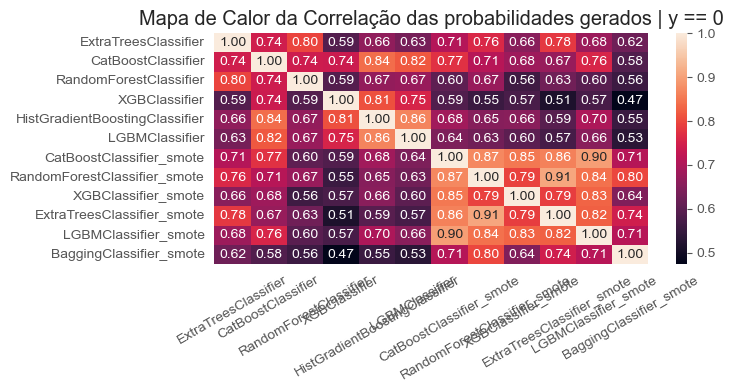

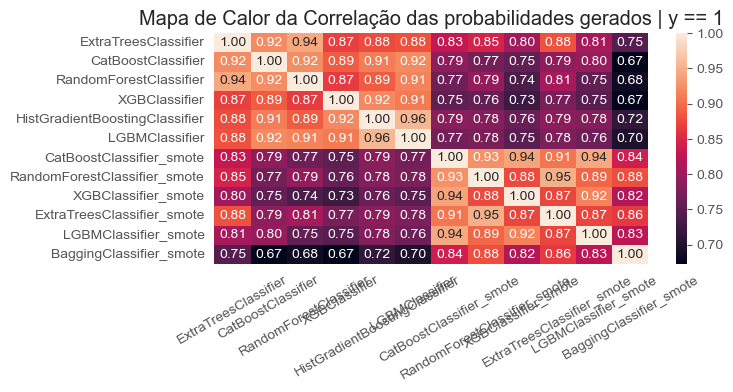

In [60]:
plt.figure(figsize=(7, 3))
sns.heatmap(correlacao_modelos_y0, annot=True, fmt=".2f")#, cmap='plasma')
plt.xticks(rotation=30)
plt.title('Mapa de Calor da Correlação das probabilidades gerados | y == 0')
plt.show()
####################################################################################
plt.figure(figsize=(7, 3))
sns.heatmap(correlacao_modelos_y1, annot=True, fmt=".2f")#, cmap='plasma')
plt.xticks(rotation=30)
plt.title('Mapa de Calor da Correlação das probabilidades gerados | y == 1')
plt.show()

# ================================================================

# Analise F-Beta das Diferenças

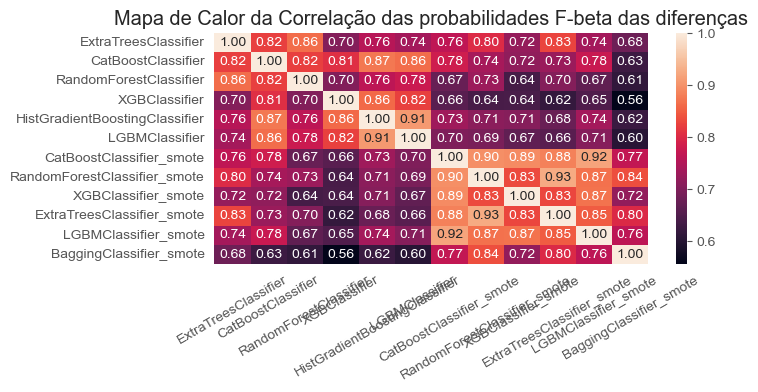

In [61]:
beta = 1#.5

delta_y1 = (1 - correlacao_modelos_y1)
#display(delta_y1.round(2))
delta_y0 = (1 - correlacao_modelos_y0)
#display(delta_y0.round(2))

# F-beta Score
denom_fb_score = (beta**2 * correlacao_modelos_y0) + correlacao_modelos_y1
escore_beta = (1 + beta**2) * (correlacao_modelos_y0 * correlacao_modelos_y1) / denom_fb_score
#############################################################################################

plt.figure(figsize=(7, 3))
sns.heatmap(escore_beta, annot=True, fmt=".2f")#, cmap='plasma')
plt.xticks(rotation=30)
plt.title('Mapa de Calor da Correlação das probabilidades F-beta das diferenças')
plt.show()

# ================================================================

# Analisando combinações de thresholds

In [62]:
from itertools import combinations

# Gerando todas as combinações de 3 itens
combinacoes_modelos = list(combinations(lista_modelos, 3))
combinacoes_modelos

[('ExtraTreesClassifier', 'CatBoostClassifier', 'RandomForestClassifier'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'XGBClassifier'),
 ('ExtraTreesClassifier',
  'CatBoostClassifier',
  'HistGradientBoostingClassifier'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'LGBMClassifier'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'CatBoostClassifier_smote'),
 ('ExtraTreesClassifier',
  'CatBoostClassifier',
  'RandomForestClassifier_smote'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'XGBClassifier_smote'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'ExtraTreesClassifier_smote'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'LGBMClassifier_smote'),
 ('ExtraTreesClassifier', 'CatBoostClassifier', 'BaggingClassifier_smote'),
 ('ExtraTreesClassifier', 'RandomForestClassifier', 'XGBClassifier'),
 ('ExtraTreesClassifier',
  'RandomForestClassifier',
  'HistGradientBoostingClassifier'),
 ('ExtraTreesClassifier', 'RandomForestClassifier', 'LGBMClassifier'),
 ('ExtraTre

In [63]:
len(combinacoes_modelos)

220

In [64]:
grade_thresholds = pd.DataFrame()

for i in range(len(combinacoes_modelos)):
    print('combinacao n:', i)

    lista = list(combinacoes_modelos[i])
    nome_combinacao = "\n".join(lista)

    modelos_escolhidos = lista
    modelos_escolhidos.append('y')

    fd_previsoes = previsoes[modelos_escolhidos]

    grade_thresholds_temp = gridsearch_mult_models_threshold(fd_previsoes, beta=1.5, linspace_thresholds = list(range(0, 95, 10)) )
    grade_thresholds_temp['nome_comp'] = nome_combinacao
    grade_thresholds_temp['m1'] = lista[0]
    grade_thresholds_temp['m2'] = lista[1]
    grade_thresholds_temp['m3'] = lista[2]

    grade_thresholds = pd.concat([grade_thresholds, grade_thresholds_temp])

grade_thresholds = grade_thresholds.round(2)
grade_thresholds_bck = grade_thresholds
print('finish')

combinacao n: 0
combinacao n: 1
combinacao n: 2
combinacao n: 3
combinacao n: 4
combinacao n: 5
combinacao n: 6
combinacao n: 7
combinacao n: 8
combinacao n: 9
combinacao n: 10
combinacao n: 11
combinacao n: 12
combinacao n: 13
combinacao n: 14
combinacao n: 15
combinacao n: 16
combinacao n: 17
combinacao n: 18
combinacao n: 19
combinacao n: 20
combinacao n: 21
combinacao n: 22
combinacao n: 23
combinacao n: 24
combinacao n: 25
combinacao n: 26
combinacao n: 27
combinacao n: 28
combinacao n: 29
combinacao n: 30
combinacao n: 31
combinacao n: 32
combinacao n: 33
combinacao n: 34
combinacao n: 35
combinacao n: 36
combinacao n: 37
combinacao n: 38
combinacao n: 39
combinacao n: 40
combinacao n: 41
combinacao n: 42
combinacao n: 43
combinacao n: 44
combinacao n: 45
combinacao n: 46
combinacao n: 47
combinacao n: 48
combinacao n: 49
combinacao n: 50
combinacao n: 51
combinacao n: 52
combinacao n: 53
combinacao n: 54
combinacao n: 55
combinacao n: 56
combinacao n: 57
combinacao n: 58
combina

In [65]:
grade_thresholds.shape

(220000, 26)

colunas = ['precisao', 'sensibilidade', 'f1', 'fb_score']
fig = px.box(grade_thresholds, y=colunas, color = 'nome_comp')
fig.show()

In [66]:
colunas_uteis = ['nome_comp', 'threshold', 
                 'tn', 'fp', 'fn', 'tp', 
                 'precisao', 'sensibilidade', 
                 'f1', 'fb_score',
                 0, 1, 2,
                 'm1','m2','m3'
                 ]
grade_thresholds = grade_thresholds[colunas_uteis]
grade_thresholds = grade_thresholds.sort_values('fb_score', ascending=False)
grade_thresholds = grade_thresholds.head(30)
grade_thresholds = grade_thresholds.reset_index()

custo_fp = 2.5
custo_fn = 20.0
grade_thresholds['custo_total'] = fd['fp']*custo_fp + fd['fn']*custo_fn

grade_thresholds

index                                          nome_comp     threshold  \
0     224  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 20, 40)   
1     212  ExtraTreesClassifier\nCatBoostClassifier\nRand...  (20, 10, 20)   
2     224  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 20, 40)   
3     224  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 20, 40)   
4     235  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 30, 50)   
5     234  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 30, 40)   
6     223  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 20, 30)   
7     233  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 30, 30)   
8     234  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 30, 40)   
9     235  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 30, 50)   
10    236  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 30, 60)   
11    215  ExtraTreesClassifier\nCatBoostClassifier\nRand...  (20, 10, 50)   
12    127  CatBoostClassifier\nRandomForestClassifier\nXG...  (10, 20, 70)   
13    245  ExtraTreesClassifier\nCatBoostClassifier_smote...  (20, 40, 50)   
14    222  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 20, 20)   
15    245  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 40, 50)   
16    226  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 20, 60)   
17    235  ExtraTreesClassifier\nCatBoostClassifier\nCatB...  (20, 30, 50)   
18    216  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 10, 60)   
19    234  ExtraTreesClassifier\nCatBoostClassifier\nCatB...  (20, 30, 40)   
20    223  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 20, 30)   
21    224  ExtraTreesClassifier\nCatBoostClassifier\nExtr...  (20, 20, 40)   
22    255  ExtraTreesClassifier\nCatBoostClassifier_smote...  (20, 50, 50)   
23    225  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 20, 50)   
24    213  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 10, 30)   
25    223  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 20, 30)   
26    225  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 20, 50)   
27    225  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 20, 50)   
28    157  ExtraTreesClassifier\nRandomForestClassifier_s...  (10, 50, 70)   
29    237  ExtraTreesClassifier\nRandomForestClassifier\n...  (20, 30, 70)   

      tn  fp  fn  tp  precisao  sensibilidade    f1  fb_score   0   1   2  \
0   1564  58  59  69      0.54           0.54  0.54      0.54  20  20  40   
1   1564  58  59  69      0.54           0.54  0.54      0.54  20  10  20   
2   1556  66  58  70      0.51           0.55  0.53      0.54  20  20  40   
3   1555  67  58  70      0.51           0.55  0.53      0.54  20  20  40   
4   1577  45  62  66      0.59           0.52  0.55      0.54  20  30  50   
5   1571  51  61  67      0.57           0.52  0.54      0.54  20  30  40   
6   1557  65  58  70      0.52           0.55  0.53      0.54  20  20  30   
7   1559  63  60  68      0.52           0.53  0.53      0.53  20  30  30   
8   1564  58  60  68      0.54           0.53  0.54      0.53  20  30  40   
9   1571  51  62  66      0.56           0.52  0.54      0.53  20  30  50   
10  1579  43  64  64      0.60           0.50  0.54      0.53  20  30  60   
11  1553  69  59  69      0.50           0.54  0.52      0.53  20  10  50   
12  1564  58  60  68      0.54           0.53  0.54      0.53  10  20  70   
13  1546  76  57  71      0.48           0.55  0.52      0.53  20  40  50   
14  1552  70  58  70      0.50           0.55  0.52      0.53  20  20  20   
15  1578  44  64  64      0.59           0.50  0.54      0.53  20  40  50   
16  1564  58  61  67      0.54           0.52  0.53      0.53  20  20  60   
17  1578  44  64  64      0.59           0.50  0.54      0.53  20  30  50   
18  1552  70  59  69      0.50           0.54  0.52      0.53  20  10  60   
19  1570  52  62  66      0.56           0.52

In [67]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        dimensions = list([
            dict(range = [0, 1], label = 'precisao', values = grade_thresholds['precisao']),
            dict(range = [0, 1], label = 'sensibilidade', values = grade_thresholds['sensibilidade']),
            dict(range = [0, 1], label = 'f1', values = grade_thresholds['f1']),
            dict(range = [0, 1], label = 'fb_score', values = grade_thresholds['fb_score'])
        ])
    )
)

fig.show()

# avaliando como o modelo trabalha

In [68]:
#for linha in range(len(grade_thresholds)):
linha = grade_thresholds.index[1]
m1, m2, m3 = grade_thresholds['m1'][linha], grade_thresholds['m2'][linha], grade_thresholds['m3'][linha]
############print(m1, m2, m3)

####################################################################################
corte1, corte2, corte3 = grade_thresholds[0][linha], grade_thresholds[1][linha], grade_thresholds[2][linha]
############print(corte1, corte2, corte3)

####################################################################################
previsoes_filter0 = previsoes[['y', m1, m2, m3]]
previsoes_filter = previsoes_filter0
############previsoes_filter.sample(5)

####################################################################################
previsoes_filter['m1_bin'] = np.where(previsoes_filter[m1] > corte1, 1, 0)
previsoes_filter['m2_bin'] = np.where(previsoes_filter[m2] > corte2, 1, 0)
previsoes_filter['m3_bin'] = np.where(previsoes_filter[m3] > corte3, 1, 0)

previsoes_filter['decisao_final'] = previsoes_filter['m1_bin'] + previsoes_filter['m2_bin'] + previsoes_filter['m3_bin']
previsoes_filter['decisao_final'] = np.where(previsoes_filter['decisao_final'] >= 2, 1, 0)
############previsoes_filter.sample(5)

####################################################################################
colunas_avaliadas = ['m1_bin','m2_bin','m3_bin','decisao_final','y']
previsoes_filter = previsoes_filter#[previsoes_filter['y'] == 1].reset_index(drop=True)
fig = px.parallel_categories(previsoes_filter[colunas_avaliadas], 
                            color='decisao_final', 
                            color_continuous_scale=px.colors.diverging.Tealrose,
                            color_continuous_midpoint=0.5)
fig.update_layout(title=grade_thresholds['nome_comp'][linha])
fig.show()

####################################################################################
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = previsoes_filter0['y'],
                   colorscale = [[0,'grey'], [1,'red']]),
        dimensions = list([
            dict(range = [0, 100],
                label = m1, values = previsoes_filter0[m1]),
            dict(range = [0, 100],
                label = m2, values = previsoes_filter0[m2]),
            dict(range = [0, 100],
                label = m3, values = previsoes_filter0[m3]),
            dict(range = [0, 1],
                #constraintrange = [0.5,1],
                label = 'y', values = previsoes_filter0['y'])
        ])
    )
)
fig.show()
####################################################################################


In [69]:
print(corte1, corte2, corte3)

20 10 20


# Criando Pós Roc

In [70]:
print(m1, m2, m3)

ExtraTreesClassifier CatBoostClassifier RandomForestClassifier


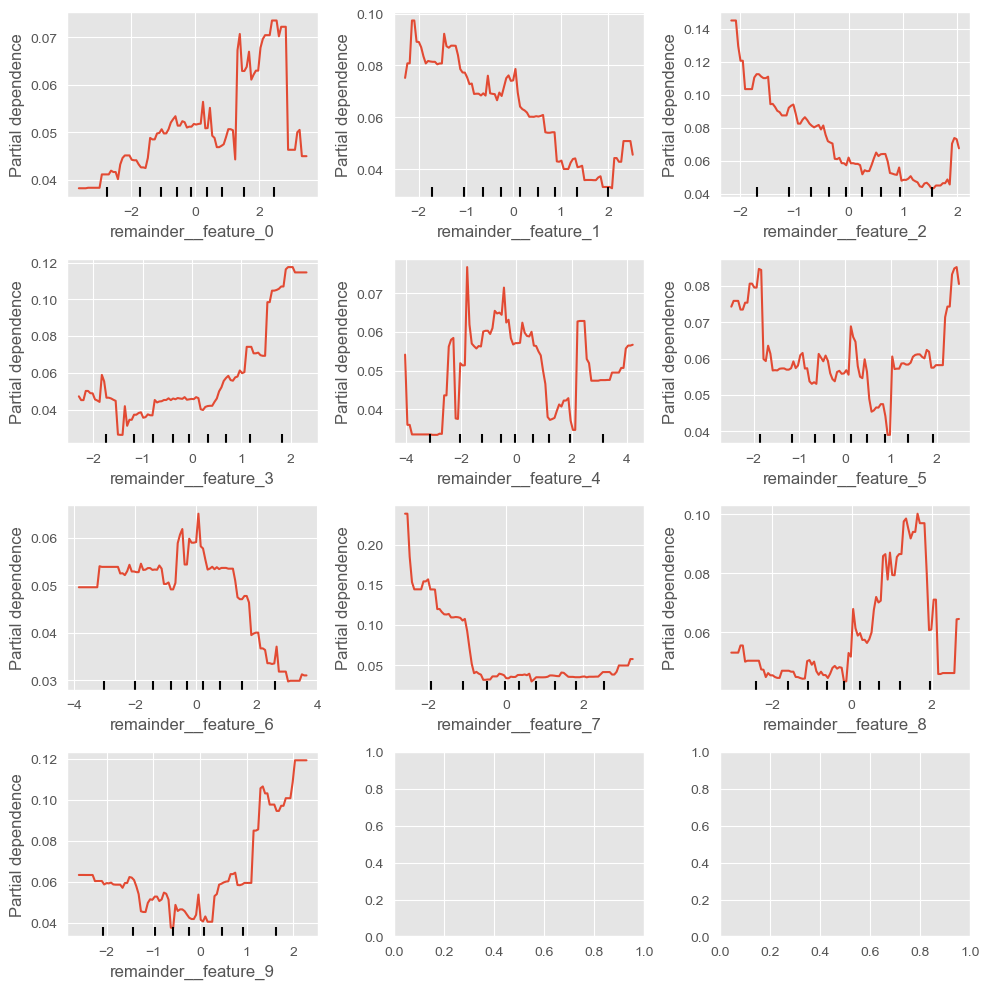

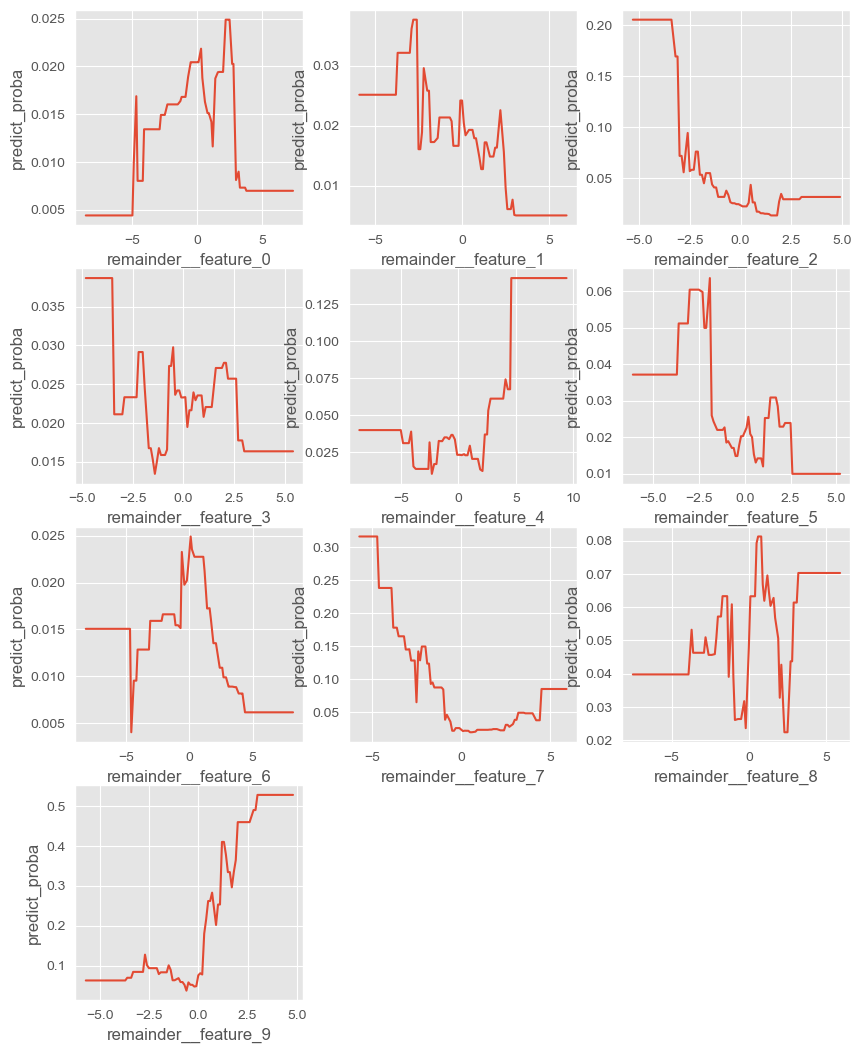

In [71]:
modelo_m1 = model_dict['LGBMClassifier']
coluna_analisada = 'remainder__' + 'feature_4'

x_data = pd.DataFrame(x_teste.values, columns=novos_nomes_colunas, index=x_teste.index)

contribuicao_proba2(x_data, modelo_m1)

plt.figure(figsize=(10, 33))
contribuicao_proba(x_data, modelo_m1, sep=100)